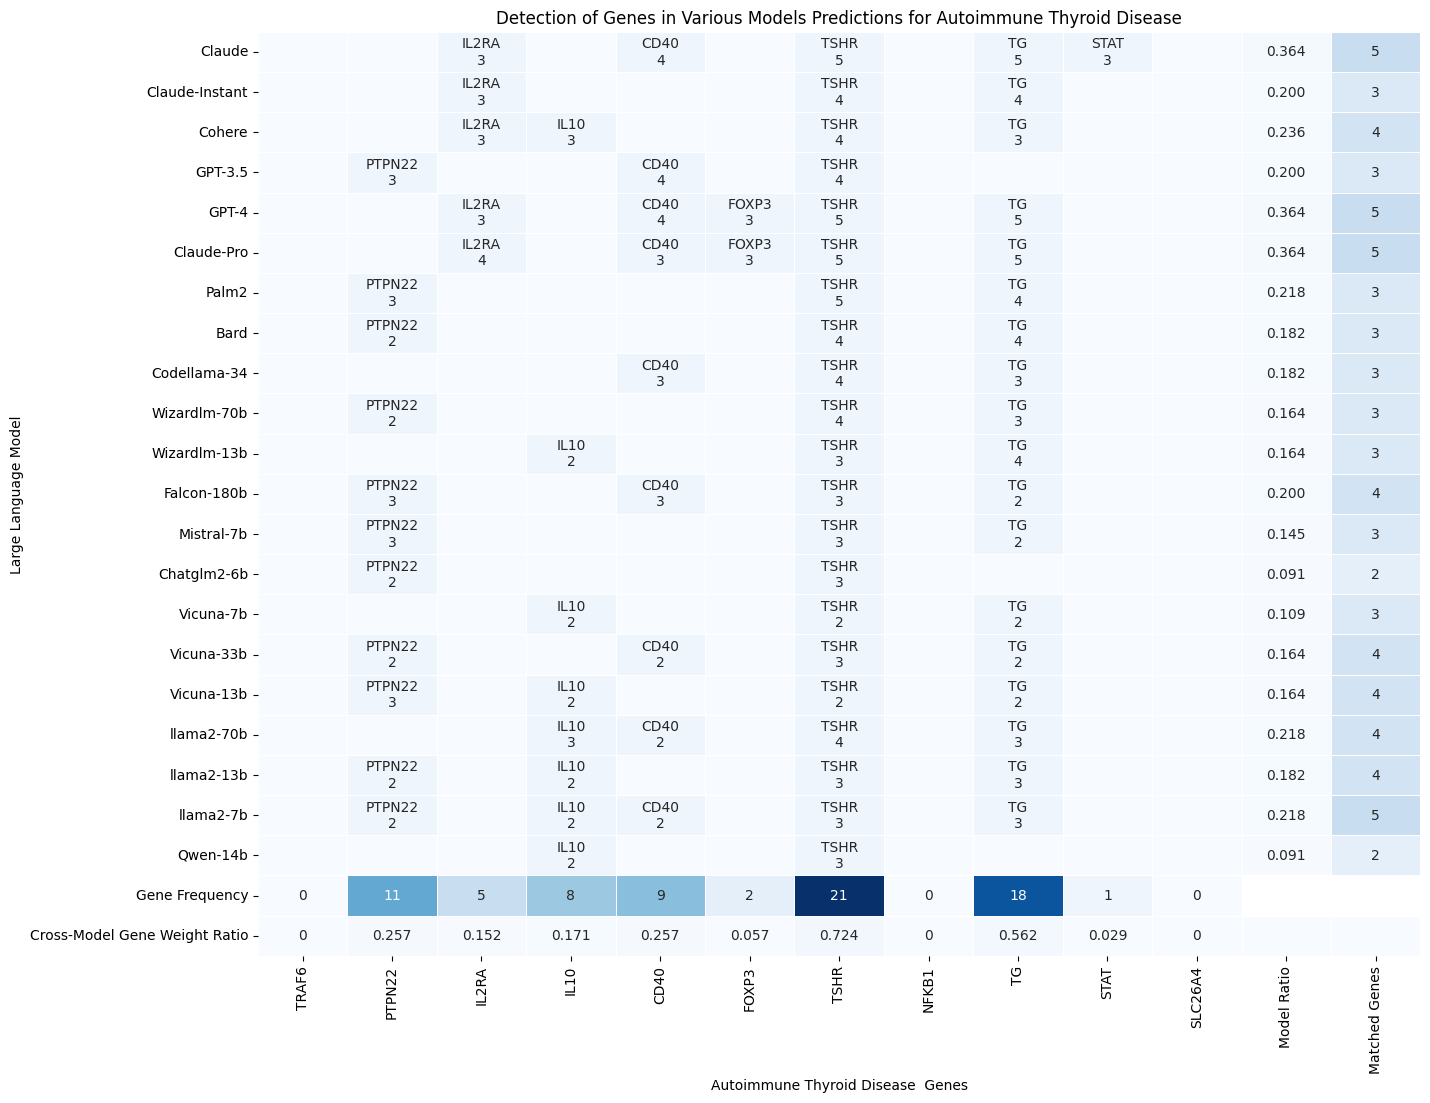

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# The set of true genes
# The set of true genes
true_genes = set([
    'TSHR', 'PTPN22', 'FOXP3', 'TG', 'CD40', 'IL2RA', 'TRAF6', 'IL10', 'STAT', 'NFKB1', 'SLC26A4'
])

# The predictions of various models for the second batch
models = {

    'Claude': ['TSHR', 'VDR', 'IL21', 'TG', 'CD40', 'IL2RA', 'IRF4', 'IL0', 'STAT', 'IFNG', 'FCGR3A'],
    'Claude-Instant': ['TSHR', 'PRKCQ', 'H2B3', 'TG', 'C40', 'IL2RA', 'CCR6', 'RKCQ', 'CD25', 'CD80', 'BACH2'],
    'Cohere': ['TSHR', 'OLFM4', 'IL21', 'TG', 'C40', 'IL2RA', 'BACH2', 'IL10', 'STAT4', 'CTLA4', 'FASLG'],
    'GPT-3.5': ['TSHR', 'PTPN22', 'PADI4', 'T', 'CD40', 'BACH2', 'CD25', 'IL0', 'FCRL3', 'IKZF1', 'IL-23R'],
    'GPT-4': ['TSHR', 'CTLA4', 'FOXP3', 'TG', 'CD40', 'IL2RA', 'VDR', 'IL0', 'VDR', 'ABCB1', 'IFNG'],
    'Claude-Pro': ['TSHR', 'TO', 'FOXP3', 'TG', 'CD40', 'IL2RA', 'AF6', 'IL1B', 'STAT4', 'IL17F', 'FCGR3A'],
    'Palm2': ['TSHR', 'PTPN22', 'PADI4', 'TG', 'IFNG', 'AIRE', 'HLA', 'CTLA4', 'XIAP', 'TYP', 'XIAP'],
    'Bard': ['TSHR', 'PTPN22', 'FM4', 'TG', 'CD0', 'ACH2', 'TAT25', 'IL1', 'AITD', 'CTLA4', 'TNF'],
    'Codellama-34': ['TSHR', 'CCR6', 'RKCQ', 'TG', 'CD40', 'IRF1', 'H2B3', 'CTLA4', 'ISG15', 'CD80', 'BACH2'],
    'Wizardlm-70b': ['TSHR', 'PTPN22', 'PADI4', 'TG', 'AIRE', 'HLA', 'CTLA4', 'XIAP', 'TYP', 'XIAP', 'AIRE'],
    'Wizardlm-13b': ['TSHR', 'OLFM4', 'IL21', 'TG', 'XYZ', 'AIRE', 'HLA', 'IL10', 'H2B3', 'CTLA4', 'ISG15'],
    'Falcon-180b': ['TSHR', 'PTPN22', 'IL2', 'TG', 'CD40', 'AIRE', 'HLA', 'IL1', 'XIAP', 'AIRE', 'XIAP'],
    'Mistral-7b': ['TSHR', 'PTPN22', 'PADI4', 'TG', 'HLA', 'CTLA4', 'XIAP', 'IL0', 'STAT4', 'CTLA4', 'XIAP'],
    'Chatglm2-6b': ['TSHR', 'PTPN22', 'PAD', 'T', 'CD4', 'BACH2', 'CD25', 'IL0', 'FCRL3', 'IKZF1', 'IL-23R'],
    'Vicuna-7b': ['TSHR', 'CCR6', 'RKCQ', 'TG', 'AIRE', 'HLA', 'CTLA4', 'IL10', 'TYP', 'XIAP', 'TYP'],
    'Vicuna-33b': ['TSHR', 'PTPN22', 'PAD', 'TG', 'CD40', 'CD4', 'BACH2', 'IL0', 'FCRL3', 'IKZF1', 'IL-23R'],
    'Vicuna-13b': ['TSHR', 'PTPN22', 'PADI4', 'TG', 'HLA', 'CTLA4', 'XIAP', 'IL10', 'XIAP', 'AIRE', 'XIAP'],
    'llama2-70b': ['TSHR', 'OLFM4', 'IL21', 'TG', 'CD40', 'CTLA4', 'XIAP', 'IL10', 'TYP', 'XIAP', 'TP'],
    'llama2-13b': ['TSHR', 'PTPN22', 'PADI4', 'TG', 'HLA', 'CTLA4', 'XIAP', 'IL10', 'XIAP', 'AIRE', 'XIAP'],
    'llama2-7b': ['TSHR', 'PTPN22', 'PADI4', 'TG', 'HLA', 'CTLA4', 'CD40', 'IL10', 'XIAP', 'AIRE', 'XIAP'],
    'Qwen-14b': ['TSHR', 'PADI4', 'ToG', 'CD0', 'BACH2', 'CD25', 'IL10', 'FL3', 'IKZF1', 'IL-23R', 'PADI4']
}

weights_data = {
    "Claude": [5, 0, 0, 5, 4, 3, 0, 0, 3, 0, 0],
    "Claude-Instant": [4, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0],
    "Cohere": [4, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0],
    "GPT-3.5": [4, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0],
    "GPT-4": [5, 0, 3, 5, 4, 3, 0, 0, 0, 0, 0],
    "Claude-Pro": [5, 0, 3, 5, 3, 4, 0, 0, 0, 0, 0],
    "Palm2": [5, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    "Bard": [4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0],
    "Codellama-34": [4, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0],
    "Wizardlm-70b": [4, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0],
    "Wizardlm-13b": [3, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0],
    "Falcon-180b": [3, 3, 0, 2, 3, 0, 0, 0, 0, 0, 0],
    "Mistral-7b": [3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0],
    "Chatglm2-6b": [3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    "Vicuna-7b": [2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0],
    "Vicuna-33b": [3, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0],
    "Vicuna-13b": [2, 3, 0, 2, 0, 0, 0, 2, 0, 0, 0],
    "llama2-70b": [4, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0],
    "llama2-13b": [3, 2, 0, 3, 0, 0, 0, 2, 0, 0, 0],
    "llama2-7b": [3, 2, 0, 3, 0, 0, 2, 2, 0, 0, 0],
    "Qwen-14b": [3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0]
}



# Constants
total_genes = 11
scaling_factor = 5
total_models = 21

# Initialize data and annotation dictionaries
data = {'Model': list(models.keys())}
annotation = {'Model': list(models.keys())}
normalized_scores = []  # To store normalized gene match scores for each model

# Initialize sum of weights for each gene
sum_weights_all_genes = {gene: 0 for gene in true_genes}

# Populate the data and annotation dictionaries
for gene in true_genes:
    data[gene] = []
    annotation[gene] = []

for model, predictions in models.items():
    sum_matched_gene_weights = 0  # Initialize sum of weights for this model
    for gene in true_genes:
        if gene in predictions:
            weight = weights_data[model][predictions.index(gene)]
            sum_matched_gene_weights += weight  # Add weight to the sum
            sum_weights_all_genes[gene] += weight  # Add to total sum for each gene
            data[gene].append(1)
            annotation[gene].append(f"{gene}\n{weight:.0f}")
        else:
            data[gene].append(0)
            annotation[gene].append("")

    normalized_score = round(sum_matched_gene_weights / (total_genes * scaling_factor), 3)
    normalized_scores.append(normalized_score)

# Create DataFrames from the dictionaries
df = pd.DataFrame(data).set_index('Model')
annotation_df = pd.DataFrame(annotation).set_index('Model')

df['Model Ratio'] = normalized_scores
annotation_df['Model Ratio'] = normalized_scores

annotation_df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)
df["Matched Genes"] = df.drop("Model Ratio", axis=1).sum(axis=1).astype(int)

gene_frequency = df.drop(["Matched Genes", "Model Ratio"], axis=1).sum()
df.loc['Gene Frequency'] = gene_frequency
annotation_df.loc['Gene Frequency'] = gene_frequency.apply(lambda x: f"\n{x}")

# Calculate and Add Cross-Model Gene Weight Ratio as a new row
cross_model_gene_weight_ratios = {gene: sum_weights_all_genes[gene] / (total_models * 5) for gene in true_genes}
df.loc['Cross-Model Gene Weight Ratio'] = df.columns.map(cross_model_gene_weight_ratios).fillna(0)
annotation_df.loc['Cross-Model Gene Weight Ratio'] = df.loc['Cross-Model Gene Weight Ratio'].apply(lambda x: f"{x:.3f}")

# Exclude the last two columns from the Cross-Model Gene Weight Ratio calculation
df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = 0
annotation_df.loc['Cross-Model Gene Weight Ratio', ['Model Ratio', 'Matched Genes']] = ""

# Custom annotation formatting
def custom_annot(val):
    if pd.isna(val):
        return ""
    try:
        # Check if the value is an integer
        if float(val).is_integer():
            return f"{int(float(val))}"
        return f"{float(val):.3f}"
    except ValueError:
        return val

annot_custom = annotation_df.applymap(custom_annot)

# Plotting the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df, cmap="Blues", cbar=False, linewidths=.5, annot=annot_custom.values, fmt='s')

plt.title('Detection of Genes in Various Models Predictions for Autoimmune Thyroid Disease')
plt.xlabel('Autoimmune Thyroid Disease  Genes')
plt.ylabel('Large Language Model')

# Adjust the alignment of x-axis tick labels (gene names)
#plt.xticks(rotation=0.1, ha='Right')  # Rotate the gene names upwards and align them to the right

plt.xticks(rotation=90, ha='center')  # Rotate the gene names vertically

plt.show()